# Why do some lakes in cold climates not freeze over?

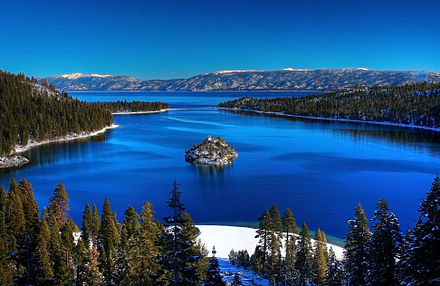

Image of Lake Tahoe (California/Nevada, USA) from Wikipedia. 

**Lake Tahoe famously doesn't freeze even though it's located high in the mountains. Why is that?**

In [1]:
# Import pyplot, our plotting library
from matplotlib.pyplot import subplots, plot, show, twinx, xlabel, ylabel

# Imports from numpy, a library for working with arrays
from numpy import cos, linspace, pi,zeros_like,diff, zeros, min

## Part 1. Lake ice growth and the conservation of energy

We start out with a very simple statement of conservation of energy: that the change specific heat (i.e., heating reflected by temperature changes) is balanced by sources of heat. In equation form, we would say that,

$$ \text{Sensible heating} + \text{Sources of heat} = 0$$

The sensible heating is just the specific heat times the rate of temperature change:

$$ (\text{Specific Heat})(\text{Rate of Temperature Change})$$

The conservation of energy can then be re-written as,
$$ \text{Rate of Temperature Change} = \frac{\text{Sources of heat}}{\text{Specific Heat}} $$
or, using symbols:
$$ \frac{\Delta T}{\Delta t} = \frac{H}{c D}$$

In [2]:
c = 4184      # The volume specific heat, J/(m^3 deg C)
H = 1         # Surface heating, J
D = 100       # Ice thickness, m

### Question #1. 
In the next cell, calculate the rate of temperature change (right hand side of the last equation):

In [3]:
H / (c*D)

2.390057361376673e-06

If you didn't change any of the above definitions, your answer should have units of (degrees C)/s. 

### Question #2. 
What is the temperature change after one day? This can be calculated by writing,
$$ \Delta T = \Delta t \frac{H}{c D}$$

In [4]:
H / (c*D) * 86400

0.20650095602294455

You just calculated the depth-averaged temperature change caused by heating of one Joule for a period of one day.

### Question #3.
If the initial temperature was 1 deg C, what is the current temperature?

## Part 2. Changes through time.

Our goal is to calculate temperatures through the year.  To do this, we'll carry out basic "time stepping". Python **for loops** are perfect for this.  Here's an example of a for-loop:

In [5]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


For our purposes, we'll use a for-loop to calculate temperature changes $\Delta T$ through time. If we add the changes onto some base value, i.e., $T_i = T_{i-1} + \Delta T$. Here's how you would timestep for ten days:

In [6]:
time = linspace(0,10,10)   # Make an array of times
T = zeros_like(time)       # Initialize a numpy array to store the temperatures
T[i-1] = 10          
H,D = 1, 100

for i,current_time_step in enumerate(time):
    T[i] = T[i-1] + H / (c*D) * 86400
    print(f'The temperature on day {i} is {T[i]:.2f} deg C')

The temperature on day 0 is 0.21 deg C
The temperature on day 1 is 0.41 deg C
The temperature on day 2 is 0.62 deg C
The temperature on day 3 is 0.83 deg C
The temperature on day 4 is 1.03 deg C
The temperature on day 5 is 1.24 deg C
The temperature on day 6 is 1.45 deg C
The temperature on day 7 is 1.65 deg C
The temperature on day 8 is 1.86 deg C
The temperature on day 9 is 2.07 deg C


### Plotting
Making plots is straightforward using pyplot. You just make a new figure, plot, and then show.

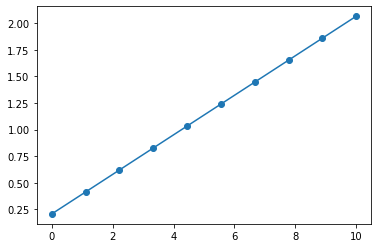

In [7]:
fig,ax = subplots()   # Make a new figure
plot(time,T,'-o')     # In the previous cell we printed the answer. This time, plot it instead.
show()

Now let's consider a diurnal heat flux. For simplicity, we'll just lump together everything that causes day-to-day changes in the heat flux into the same single variable, H.

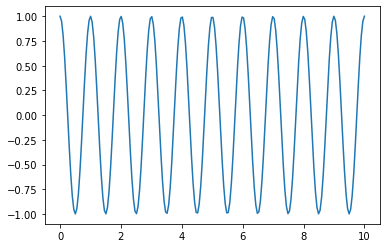

In [8]:
time = linspace(0,10,200)   # We need more dense sampling in time in order to resolve daily variations
dt = diff(time)[0]
H = cos(2*pi*time)
fig,ax = subplots()         # Make a new figure
plot(time,H)

### Question #4.
Calculate and plot the temperature change if there is a daily heat flux variation

In [9]:
D = 100
T = zeros_like(H)           # Initialize a numpy array to store the temperatures
T[-1]=0.25                   # Set the initial temperature

# Now, step through time:
for i,current_time_step in enumerate(time):
    T[i] = T[i-1] + dt * H[i] / (c*D) * 86400    

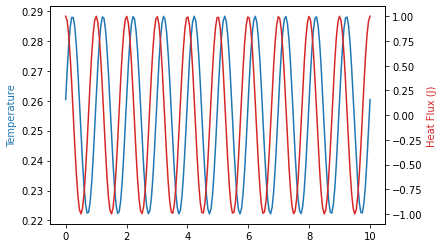

In [10]:
fig,ax = subplots()         # Make a new figure    
plot(time,T)
ax2 = twinx(ax)
ax2.plot(time,H,'C3')
ax2.set_ylabel('Heat Flux (J)',color='C3')
ax.set_ylabel('Temperature',color='C0')
show()

We say that temperature and heat flux are *out of phase* since they are both sinusoidal but have a constant offset in time.

Now let's calculate the minimum temperature during these ten days:

In [11]:
min(T)

0.2221869321640957

### Question #5.
Repeat the last calculation with a shallower lake depth of 10m.

In [12]:
D = 10 # m

In [13]:
T = zeros_like(H)           # Initialize a numpy array to store the temperatures
T[-1]=0.25                   # Set the initial temperature

for i,current_time_step in enumerate(time):

    T[i] = T[i-1] + dt * H[i] / (c*D) * 86400    

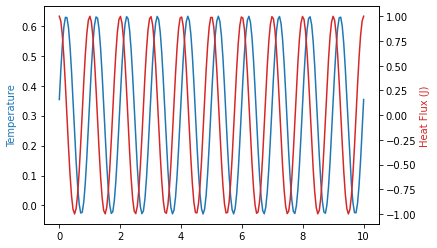

In [14]:
fig,ax = subplots()         # Make a new figure
plot(time,T)
ax2 = twinx(ax)
ax2.plot(time,H,'C3')
ax2.set_ylabel('Heat Flux (J)',color='C3')
ax.set_ylabel('Temperature',color='C0')
show()

In [15]:
min(T) # Again, calculate the minimum temperature. Is this number different than before?

-0.028130678359043777

### Question #6. 
Now, write a for-loop *over depth* to calculate the minimum temperature as a function of depth.  This is going to require writing two, "nested" for-loops, one inside of the other.  You'll also need to have two indices for T, one for time (like we had above) and one for depth.  To get you started, here's a new initialized array for the temperatures:

In [16]:
D = linspace(1,100,50)       # Vary depth from 1 to 100 m, choosing 50 values in this range
T = zeros((len(H),len(D)))   # Initialize a numpy array to store the temperatures
T[-1]=0.25                   # Set the initial temperature

In [17]:
for j,this_D in enumerate(D):
    for i,current_time_step in enumerate(time):
        T[i,j] = T[i-1,j] + dt * H[i] / (c*this_D) * 86400    

### Question #7. 
Plot minimum temperature as a function of depth. Can you guess why this curve has the shape that it does? Is our model missing any important physics?

Text(0, 0.5, 'Min temperature (deg C)')

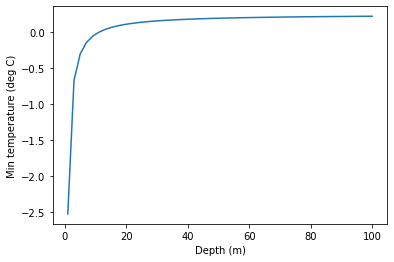

In [18]:
plot(D,min(T,axis=0))
xlabel('Depth (m)')
ylabel('Min temperature (deg C)')